In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df=pd.read_csv('forestfires_cleaned.csv')

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1.0,6.0,2012.0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2.0,6.0,2012.0,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3.0,6.0,2012.0,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4.0,6.0,2012.0,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5.0,6.0,2012.0,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [4]:
df.drop(columns=['month', 'day','year'], inplace=True)

In [5]:
df['Classes'] = df['Classes'].str.strip().map({'not fire': 0, 'fire': 1})

In [6]:
### Independent and Dependent Variables
X = df.drop('FWI', axis=1)
y = df['FWI']

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


<Axes: >

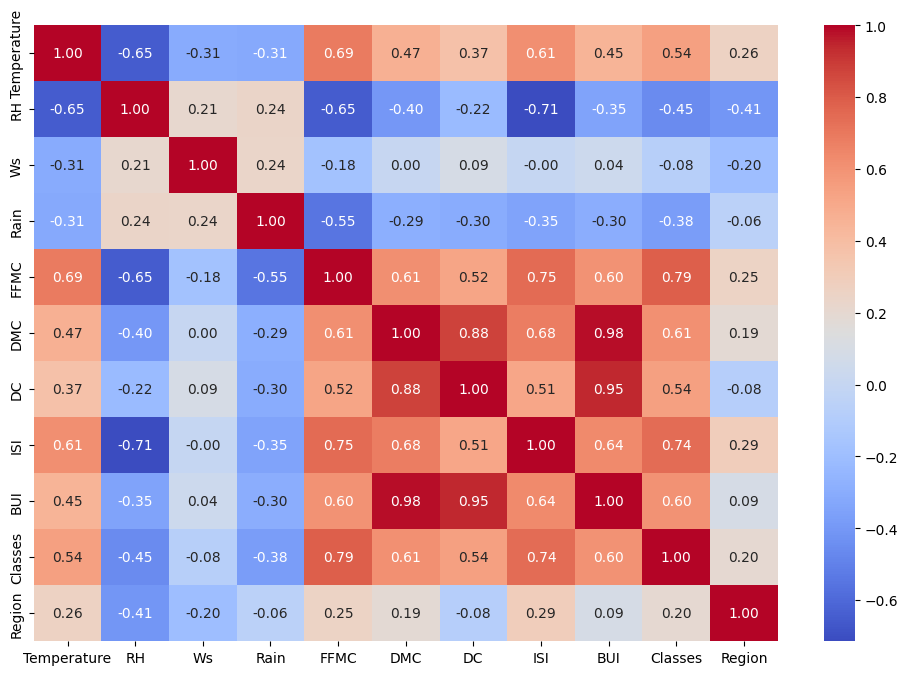

In [8]:
### Feature Selection based on Correlation
X_train.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(X_train.corr(), annot=True, fmt='.2f', cmap='coolwarm')

In [9]:
def corr(dataset,threshold):
    col_corr= set()  # Set of all the names of correlated columns
    corr_matrix= dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:  # we are interested in absolute values
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [10]:
features=corr(X_train, 0.8)

In [11]:
X_train.drop(columns=features, inplace=True)
X_test.drop(columns=features, inplace=True)

In [12]:
### Scaling the Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

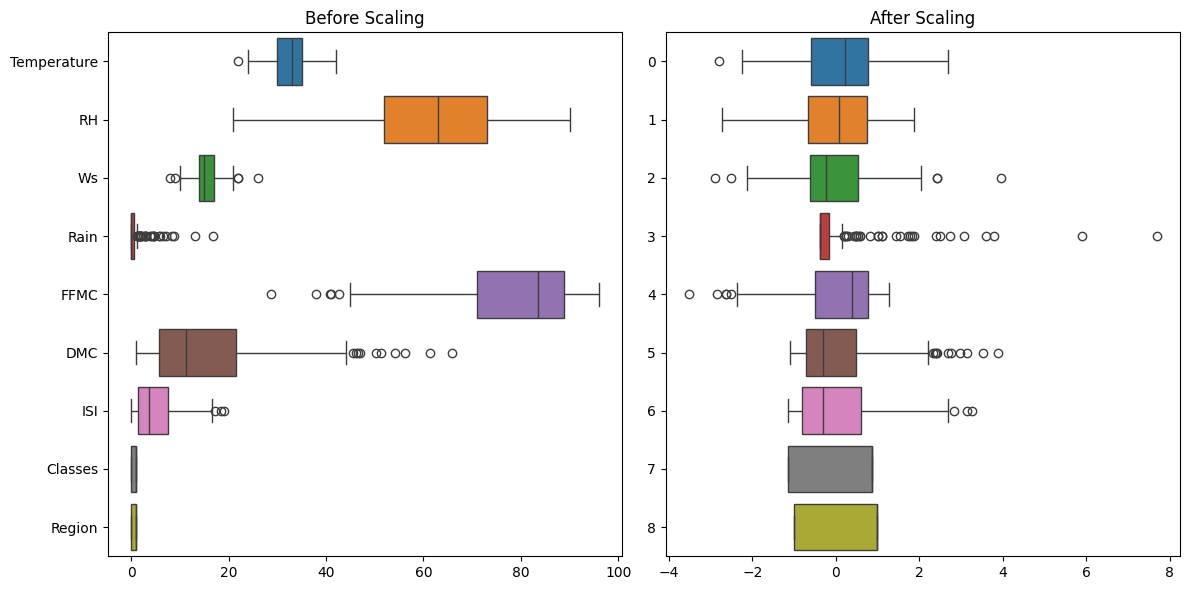

In [13]:
### Box plot to under the effect of scaling
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train, orient='h')
plt.title('Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled, orient='h')
plt.title('After Scaling')
plt.tight_layout()
plt.show()


In [14]:
### Model Training
from sklearn.linear_model import Lasso, Ridge, LinearRegression
reg_model = LinearRegression()
reg_model.fit(X_train_scaled, y_train)
from sklearn.metrics import mean_squared_error, r2_score
y_pred = reg_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [15]:
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.5882990110708648
R-squared: 0.9805895859259883


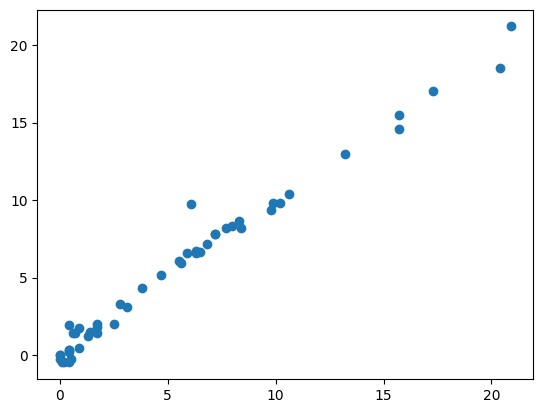

In [16]:
plt.scatter(y_test, y_pred)

In [17]:
###Lasso Regression
lasso_model = Lasso()
lasso_model.fit(X_train_scaled, y_train)
y_pred_lasso = lasso_model.predict(X_test_scaled)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
print(f'Lasso Mean Squared Error: {mse_lasso}')
print(f'Lasso R-squared: {r2_lasso}')


Lasso Mean Squared Error: 1.726042325023142
Lasso R-squared: 0.9430507350726562


In [18]:
ridge_model = Ridge()
ridge_model.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_model.predict(X_test_scaled)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f'Ridge Mean Squared Error: {mse_ridge}')
print(f'Ridge R-squared: {r2_ridge}')

Ridge Mean Squared Error: 0.6029616070548557
Ridge R-squared: 0.9801058063273602


In [19]:
###Elastic Net Regression
from sklearn.linear_model import ElasticNet
elastic_net_model = ElasticNet()
elastic_net_model.fit(X_train_scaled, y_train)
y_pred_elastic = elastic_net_model.predict(X_test_scaled)
mse_elastic = mean_squared_error(y_test, y_pred_elastic)
r2_elastic = r2_score(y_test, y_pred_elastic)
print(f'Elastic Net Mean Squared Error: {mse_elastic}')
print(f'Elastic Net R-squared: {r2_elastic}')


Elastic Net Mean Squared Error: 4.009921298441002
Elastic Net R-squared: 0.8676961352267807


In [20]:
### Cross-Validation Lasso
from sklearn.linear_model import LassoCV
lasso_cv_model = LassoCV(cv=5)
lasso_cv_model.fit(X_train_scaled, y_train)
y_pred_lasso_cv = lasso_cv_model.predict(X_test_scaled)
mse_lasso_cv = mean_squared_error(y_test, y_pred_lasso_cv)
r2_lasso_cv = r2_score(y_test, y_pred_lasso_cv)
print(f'Lasso CV Mean Squared Error: {mse_lasso_cv}')
print(f'Lasso CV R-squared: {r2_lasso_cv}')

Lasso CV Mean Squared Error: 0.6568370026125329
Lasso CV R-squared: 0.978328234520343


In [21]:
lasso_cv_model.alpha_

np.float64(0.04391080246587261)

In [22]:
lasso_cv_model.alphas_

array([7.1563667 , 6.67405153, 6.2242428 , 5.80474966, 5.41352896,
       5.04867523, 4.70841142, 4.39108025, 4.09513613, 3.81913766,
       3.56174057, 3.32169117, 3.09782031, 2.88903759, 2.69432612,
       2.51273756, 2.34338746, 2.18545099, 2.0381589 , 1.90079382,
       1.77268667, 1.65321353, 1.54179247, 1.43788081, 1.34097246,
       1.2505954 , 1.16630946, 1.08770411, 1.01439649, 0.94602956,
       0.88227033, 0.82280827, 0.76735374, 0.71563667, 0.66740515,
       0.62242428, 0.58047497, 0.5413529 , 0.50486752, 0.47084114,
       0.43910802, 0.40951361, 0.38191377, 0.35617406, 0.33216912,
       0.30978203, 0.28890376, 0.26943261, 0.25127376, 0.23433875,
       0.2185451 , 0.20381589, 0.19007938, 0.17726867, 0.16532135,
       0.15417925, 0.14378808, 0.13409725, 0.12505954, 0.11663095,
       0.10877041, 0.10143965, 0.09460296, 0.08822703, 0.08228083,
       0.07673537, 0.07156367, 0.06674052, 0.06224243, 0.0580475 ,
       0.05413529, 0.05048675, 0.04708411, 0.0439108 , 0.04095

In [23]:
lasso_cv_model.mse_path_

array([[68.58934997, 64.28650232, 49.25415197, 79.11474083, 38.68688171],
       [63.2664675 , 58.77362304, 43.20292636, 77.07183352, 34.66910628],
       [56.87389457, 51.79652473, 37.15764773, 69.4806422 , 31.16497557],
       [51.2737596 , 45.69461734, 31.98560721, 62.80993539, 27.46286399],
       [45.36816855, 40.35928545, 27.56726322, 56.94442062, 23.75447628],
       [39.875005  , 35.69250404, 23.79907917, 50.31847875, 20.54655878],
       [35.0794232 , 31.60885664, 20.59132915, 44.35263414, 17.77349727],
       [30.89154006, 28.0342798 , 17.86626498, 39.14265375, 15.37720198],
       [27.23334321, 24.90389594, 15.55674604, 34.59116894, 13.30754905],
       [24.03652419, 22.16129069, 13.60451947, 30.61376519, 11.52101422],
       [21.24273995, 19.75730052, 11.95924131, 27.13693185,  9.97950732],
       [18.80004176, 17.64896267, 10.57738151, 24.09623192,  8.65087048],
       [16.66356323, 15.79916526,  9.42117661, 21.43679316,  7.50627555],
       [14.79422393, 14.17520895,  8.4

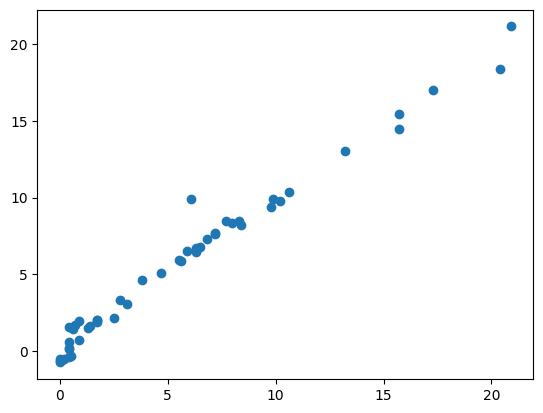

In [24]:
plt.scatter(y_test, y_pred_lasso_cv)

In [25]:
### Pickle the Model
import pickle
with open('forest_fire_model.pkl', 'wb') as file:
    pickle.dump(ridge_model, file) ###Since it has the best performance
with open('forest_fire_scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file) ###Saving the scaler for future use

In [ ]:
### After saving the model, we will create a web application using Flask to predict the Forest Fire Weather Index (FWI) based on user inputs.
### After creating the flask app, we will deploy it on a cloud platform like Heroku or AWS to make it accessible online.


StandardScaler()